In [1]:
# import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
# read data
data = pd.read_csv("CA.csv")
print(data)
year1 = data[['Year'][-10:]]
#print(year1)
year2 = data[['Year'][:-10]]

# Using time series prediction of future feature data
# k is the number of past years used for prediction
k=3
all_x = np.zeros((50 - k, 3))
all_y = np.zeros((50 - k, 1))

for i in range(0, 50 - k):
    all_x[i, :] = data['PAPRB'][i:i+k].T
    all_y[i, :] = data['PAPRB'][i+k]
# split data for train and test    
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.2)

    Unnamed: 0    Year    HYTCP    WYTCP   SOEGP    NUETP           GDP  \
0            0  1960.0  17445.0      0.0     0.0      0.0  5.143560e+04   
1            1  1961.0  15368.0      5.0     0.0      0.0  5.689940e+04   
2            2  1962.0  22835.0      7.0     0.0      0.0  6.236320e+04   
3            3  1963.0  25334.0    193.0     0.0      0.0  6.780900e+04   
4            4  1964.0  22098.0    367.0     0.0      0.0  7.351300e+04   
5            5  1965.0  30523.0    270.0     0.0      0.0  7.825300e+04   
6            6  1966.0  26236.0    163.0     0.0      0.0  8.462700e+04   
7            7  1967.0  35277.0    563.0     0.0      0.0  8.957100e+04   
8            8  1968.0  27175.0   1505.0     0.0      0.0  9.872100e+04   
9            9  1969.0  40418.0   2458.0     0.0      0.0  1.066290e+05   
10          10  1970.0  38082.0   3132.0     0.0      0.0  1.119850e+05   
11          11  1971.0  39018.0   3519.0     0.0      0.0  1.203720e+05   
12          12  1972.0  3

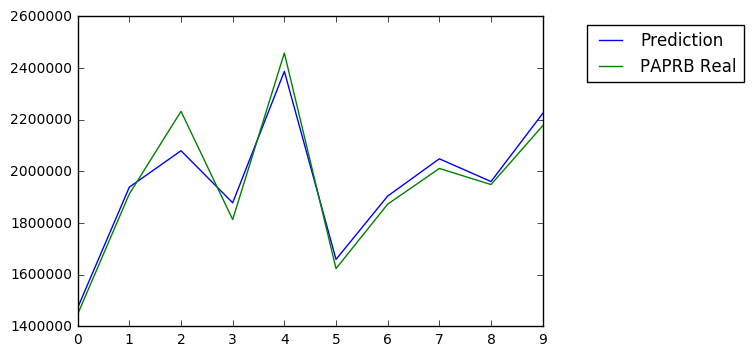

In [4]:
# Show how close time series predicts the data compared to test data
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

plt.plot(regr.predict(test_x))
plt.plot(test_y)
plt.legend(['Prediction', 'PAPRB Real'], bbox_to_anchor=(1.45, 1))
plt.show()

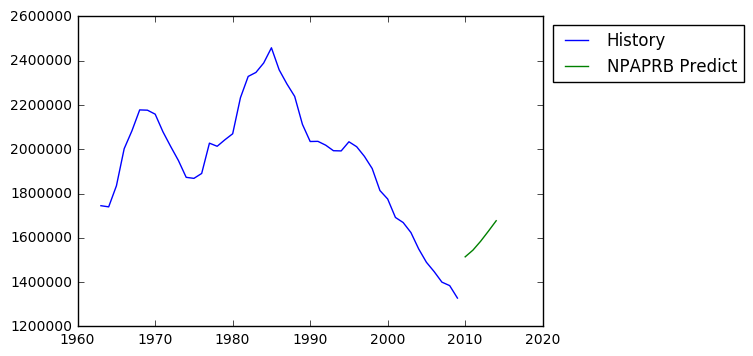

In [5]:
# use time series to predict next five years
future_x = np.copy(data['PAPRB'][-k:].values.reshape(1, -1))
pred_y = np.zeros((5, 1))
for i in range(5):
    future_y = regr.predict(future_x)
    future_x[:, 0:2] = future_x[:, 1:3]
    future_x[:, 2] = future_y
    pred_y[i, :] = future_y[0, 0]


plt.figure()
plt.plot(np.arange(1960 + k, 2010), all_y)
plt.plot(np.arange(2010, 2015), pred_y)
plt.legend(['History', 'NPAPRB Predict'], bbox_to_anchor=(1.45, 1))
plt.show()